## k-최근접 이웃 회귀


### 1. k-최근접 이웃 분류 알고리즘 &  k-최근접 이웃 회귀 알고리즘

#### (1) 분류 알고리즘

- 예측하려는 샘플에 가장 가까운 샘플 k개를 선택해서 그들의 클래스를 확인하고, 다수 클래스를 예측하려는 샘플의 클래스로 결론을 내린다.

e.g., 최근접 이웃 5개중에 빙어 4개, 도미 1개라면, 빙어로 예측 타겟을 분류한다 
  
#### (2) 회귀 알고리즘

- 예측하려는 샘플에 가장 가까운 이웃 샘플 k개를 선택해서 그들의 수치들의 평균을 구해서 예측 타깃값을 찾는다.

e.g., 최근접 이웃 3개의 값이 60, 80 100 이라면, 예측 타겟 값은 이 세 값의 평균값인 80이다.

**회귀 문제:** 클래스 중 하나로 분류하는 것이 아니라 값을 예측하는 문제이다. (e.g., 내년도 경제 성장률을 예측하거나 배달이 도착할 시간을 예측하는 것이 회귀 문제이다.)

**k-최근접 이웃 회귀 알고리즘으로 무게값 예측해보자**

### 2. 데이터 준비

#### 특성 데이터(input)와 타깃데이터(target) 준비

- 농어의 길이가 특성이고 무게가 타깃이 된다.
- 넘파이 배열에 데이터를 담는다.

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

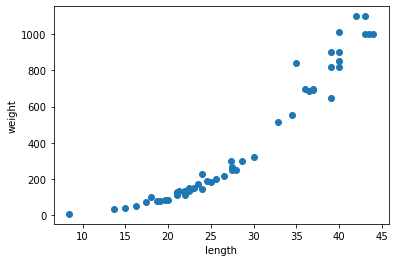

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show() #농어의 길이가 커짐에 따라 무게도 늘어난다.

#### train_test_split() 함수 활용 

농어 데이터를 훈련 세트(train)와 테스트 세트(test)로 나눈다.

현재 갖고있는 특성/타겟 데이터들은 각각 1차원 배열이다.
- 파이썬에서 1차원 배열의 shape은 원소가 1개인 튜플로 나타난다.
- 예를 들어서 data = [1,2,3,4 ]가 있다면, data의 shape = (4,) --> 1차원이라는 것을 comma로 알려준다.

#### reshape() 함수 활용

농어길이 데이터(perch_length)는 1차원 배열이므로 scikit-Learn에서 사용할 수 있도록 2차원 배열로 변경한다.

- reshape()로 배열의 shape을 변경할 수 있다.
- 바꾸기 전 원본 배열의 원소 개수와 바꿀려고 하는 원소개수는 같아야 한다.


- 변경전:

[1,2,3] : 1차원 배열 (원소 3개)

- 변경후:

[[1],

 [2],
 
 [3]] : 2차원 배열 (원소 3개)

In [5]:
#주어진 데이터 리스트
data_list = [1,2,3,4]

#list를 numpy의 (array)배열로 변경 
data_array = np.array(data_list)

#배열의 크기 확인
print(data_array.shape)
data_array

(4,)


array([1, 2, 3, 4])

In [6]:
#1차원 배열을 2차원배열로 변경
test_array = data_array.reshape(2,2)

#배열의 크기 확인
print(test_array.shape)
test_array

(2, 2)


array([[1, 2],
       [3, 4]])

In [14]:
#reshape() 연습

data = [11, 12, 13, 21, 22, 23, 31, 32, 33, 41, 42, 43]
data_array = np.array(data)
print("측정값이 쭉 나열된 모양:")
print(data_array) 

test_array = data_array.reshape(-1,4)
print("x,y,z,w 항목별로 나누어 2차원 배열로 변경")
print(test_array)
print(test_array.shape)

test_array2 = data_array.reshape(-1,3)
print("x,y,z 항목별로 나누어 2차원 배열로 변경")
print(test_array2)
print(test_array2.shape)

측정값이 쭉 나열된 모양:
[11 12 13 21 22 23 31 32 33 41 42 43]
x,y,z,w 항목별로 나누어 2차원 배열로 변경
[[11 12 13 21]
 [22 23 31 32]
 [33 41 42 43]]
(3, 4)
x,y,z 항목별로 나누어 2차원 배열로 변경
[[11 12 13]
 [21 22 23]
 [31 32 33]
 [41 42 43]]
(4, 3)


- reshape()함수에 크기를 -1으로 지정하면 넘파일 배열의 크기를 자동으로 지정해준다.
- reshape(-1, 1) 는 reshape(원래크기,1)와 같다. 매번 데이터 크기를 외울필요가 없음.

In [16]:
#훈련과 테스트용으로 데이터를 나누고
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)
#기본 기준인 75% vs. 25%로 훈련용과 테스트용이 나누어짐.

(42,) (14,)


In [17]:
#2차원 배열 모양으로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape) # 42 rows & 1 column 
# 42개의 생선의 length(특성)을 측정해서 얻은 data set과 같음.

(42, 1) (14, 1)


### 3. 머신러닝 모델 만들기
- KNeighborsRegressor 클래스로 k-최근접 이웃 회귀 알고리즘을 구현한다.
- fit()으로 훈련하고 socre()로 모델을 테스트 해서 점수를 확인한다.

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

#k-최근접 이웃 회귀 모델을 훈련한다.
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

### 결정계수(confficient of determinatioin) R^2 
### mean_absolute_error()함수

- 결정계수(confficient of determinatioin) 'R2'로 회귀의 정확도를 평가한다.
- 분류에서 정확도는 정답을 맞힌 개수의 비율이다. (회귀에서는 완벽한 정확도를 얻기는 불가능하다.)

- 결정계수의 계산방식:

R^2 = 1 - (target과 predict차이)^2 / (target과 mean차이)^2

- R2의 값은 score()의 출력되는 값이 높을 수록 좋은 것으로 보면 된다.
(예측한 값이 target과 차이가 적다는것을 뜻한다)

- R2가 직감적으로 얼마나 좋은지 이해하기 위해 타깃과 예측값 사이의 차이를 구해보면된다. (어느정도 예측을 벗어났는지)

- 사이킷런은 sklearn.metrics 패키지의 mean_absolute_error()로 타킷과 절대값의 오차 평균을 반환한다.

In [19]:
from sklearn.metrics import mean_absolute_error

#테스트 세트로 예측값을 구한다.
test_prediction = knr.predict(test_input)

#예측값과 테스트 타겟간의 평균 절대값 오차를 계산한다.
mean_abs = mean_absolute_error(test_target, test_prediction)

print(mean_abs)

19.157142857142862


#### ==> 예측이 평균적으로 19g정도 타깃값과 다르다는 것을 나타낸다.

### 4. 과대적합과 과소적합

모델의 훈련 성능을 평가한다.

(1) 과대적합

- **훈련세트 정확도 high, BUT 테스트세트 정확도 low**

- 모델을 훈련세트에 훈련하면 훈련세트에만 잘 맞는 모델이 만들어질 수 있다. 훈련세트에 잘 맞는 모델이라 테스트 세트나 나중에 실저에 투입하여 새로운 샘플에 대한 예측을 만들때 잘 동작하지 못하는 것이다.

- 이 모델을 훈련세트와 테스트 세트에서 평가하면 훈련 세트에서 모델을 훈련했기
  때문에 훈련세트의 점수가 조금 높게 나온다.
  
- 훈련세트에서 평가 점수가 굉장히 높았는데 테스트 세트에서는 점수가 굉장히
  나쁘다면 모델이 훈련세트에 과대 적합(Overfiting) 되었다고 할 수 있다. (모델이 훈련세트에만 최적화되어있어 실제 테스트 데이터로는 제대로 예측을 못하는 case임)
  

  
(2) 과소 적합

- **테스트세트 정확도 higher than 훈련세트 정확도 or both too low**

- 훈련세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우는 모델이
  훈련세트에 과소 적합(underfiting)되었다고 한다.
  
- 모델이 너무 단순하여 훈련세트에 적절히 훈련되지 않은 경우 이다.

- 훈련세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련세트를 잘 학습하는
  것이 중요한다.
  
- 훈련세트와 테스트 세트의 크기가 매우 작을때도 과소적합이 일어난다.

- 농어 무게를 예측하는 모델을 평가한 모델은 훈련세트 보다 테스트 세트의 점수가
  높아 과소적합한다. 

In [11]:
#테스트 점수
knr.score(test_input, test_target)

0.992809406101064

In [12]:
#훈련 점수
knr.score(train_input, train_target)

0.9698823289099254

테스트 점수가 훈련 점수보다 더 높다. 훈련이 아직 덜 이루어졌다. 

#### ==> 과소 적합

이문제를 해결하기 위해 훈련세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아진다. 이웃세트를 줄여서 더 훈련에 민감해지도록 만들 수 있다.
  
이웃의 개수를 줄이면 훈련세트에 있는 국지적인 패턴에 민감해지고, 이웃 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따르게 된다. 그래서 이웃의 개수를 5에서 3으로 낮춘다.

In [20]:
# 최근접 이웃 3개만 선정
knr.n_neighbors = 3

# 모델을 다시 훈련한다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [21]:
print(knr.score(test_input, test_target))

0.9746459963987609


#### ==> 테스트 세트의 점수는 훈련세트보다 낮아졌으므로 과소적합 문제를 해결했다.

## 선형 회귀
### 1. k-최근접 이웃 회귀모델의 한계
- 농어의 길이로 농어의 무게를 예측하는 머신러닝 모델에서 두개의 샘플로 예측을 해본다.
- 길이가 각각 50과 1000인 농어의 무게를 예측하면 동일한 값이 나와서 머신러닝 모델이
  문제가 있다는 것을 확인할 수 있다.
- 앞에서 만든 k-최근접 이웃 회귀모델을 복사한후 길이가 각각 50, 1000 인 샘플을 예측해본다.

In [16]:
print(knr.predict([[50]]))

[1033.33333333]


In [19]:
print(knr.predict([[1000]]))

[1033.33333333]


길이에 20배수준으로 차이가 나는 샘플의 무게는 동일하게 나온다 큰 문제가 있는것이다.

- 길이 50 인 농어와 이농어의 최근접 이웃을 산점도에 그려본다.
- kneighbors() 메서드를 사용하면 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를
  얻을 수 있다.

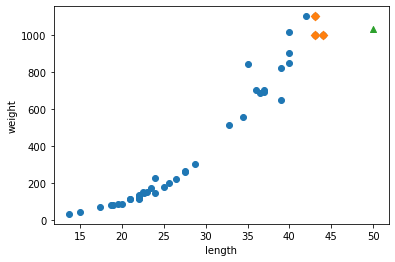

In [22]:
import matplotlib.pyplot as plt
 
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])
 
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 초록색 삼각형이 길이 50, 무게 1,033인 농어이다 이웃은 오렌지 마름모로 보여진다.
- 이산점도는 길이가 길어지면 무게가 증가하는 경향이 있는데 초록 삼각형 모양의 길이 50
  의 농어는 길이가 45센티 근방 이웃들의 평균으로 무게가 계산되었다.
- 예측값과 이웃들의 평균값이 동일하다.

In [23]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [24]:
print(knr.predict([[1000]]))

[1033.33333333]


- 새로운 샘플은 훈련 세트의 범위를 벗어나서 엉뚱한 값을 예측할 수 있다.
- 길이가 1000센티인 농어의 무게도 예측하면 1,033그램으로 나왔다.
- 산점도로 확인한다.

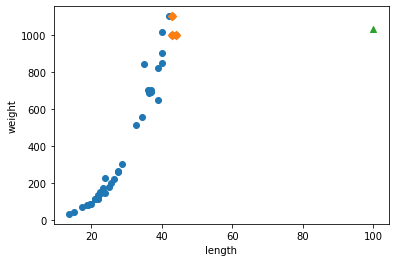

In [25]:
# 1000cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[1000]])
 
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 농어의 길이가 아무리커도 무게는 늘어나지 않는다.
## 예측할 샘플이 훈련세트에 포함하지 않아도 제대로 예측할 수 있는 다른 알고리즘을 선택해야 한다.